In [3]:
import pandas as pd
import pickle
import math
import numpy as np
import pandas as pd
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score,mean_squared_log_error,median_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import csv
import time

In [2]:
# pre
data_dir = "../../data/"
def save_obj(obj, name ):
    with open( name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    with open(data_dir + name + '.pkl', 'rb') as f:
        return pickle.load(f)
    
training_data_list = load_obj("SBdata_all_feature-v2")
test_data = load_obj("SB_testData_all_feature-V2")
# grid_search = load_obj("grid_search_rf_regressor_first_0_91")

# Get the training_data_df
training_data_df = pd.DataFrame(training_data_list) 
final_training_data_df = training_data_df.iloc[:,2:20]
# 0.511756 0.028259
# get the labeled data df
final_labels_df = training_data_df.iloc[:,1]
test_data_df = pd.DataFrame(test_data) 



In [5]:
# modeling
X=final_training_data_df

# get the data and label
y=final_labels_df

X_t, X_test, y_t, y_test = train_test_split(X,y)

pipeline = Pipeline([
    ('lr', LogisticRegression())
])

parameters = {
       'lr__penalty': ('l1','l2'),
       'lr__C': (1, 10, 15, 20)
 }

# 1. training_df_10w running
X_train = X_t
y_train = y_t
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1,
   verbose=1, scoring='roc_auc', cv=3)
grid_search.fit(X_train, y_train)


print('Best score: %0.3f' % grid_search.best_score_)
print('Best parameters set:')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print('\t%s: %r' % (param_name, best_parameters[param_name]))
predictions = grid_search.predict(X_test)
predictions = grid_search.predict(X_test)
print('Accuracy:', accuracy_score(y_test, predictions))
print('Precision:', precision_score(y_test, predictions))
print('Recall:', recall_score(y_test, predictions))

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  3.6min finished


Best score: 0.937
Best parameters set:
	lr__C: 20
	lr__penalty: 'l1'
Accuracy: 0.8881866666666667
Precision: 0.9121940201586719
Recall: 0.8596248503392311


ValueError: c of shape (300000,) not acceptable as a color sequence for x with size 225000, y with size 225000

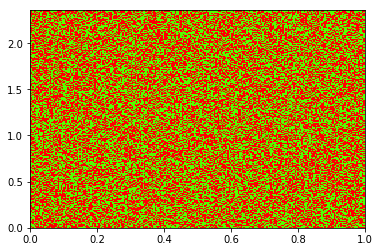

In [61]:
N, M = 250, 300
x1_min, x1_max = X_train.iloc[:, 2].min(), X_train.iloc[:,2].max()
x2_min, x2_max = X_train.iloc[:, 3].min(), X_train.iloc[:, 3].max()

t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, M)
x1, x2 = np.meshgrid(t1, t2)
x_test = np.stack((x1.flat, x2.flat), axis=1)
y_hat = grid_search.predict(X_test)


import matplotlib.pyplot as plt

y_hat = y_hat.reshape(x1.shape)

plt.pcolormesh(x1, x2, y_hat, cmap=plt.cm.prism)

plt.scatter(X_train.iloc[:, 2], X_train.iloc[:, 3], c=y, edgecolors='k', cmap=plt.cm.prism)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid()
plt.show()


In [56]:
X_test.shape

(75000, 18)

In [57]:
import math
math.sqrt(75000)

273.8612787525831

In [52]:
x1.shape

(500, 500)

In [45]:
x1_min, x1_max

(0.0, 1.0)

In [48]:
x2_min, x2_max

(0.0, 2.3553437659118046)

In [29]:
X_train

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
201649,0.000000,0.000000,0.000000,0.000000,0.000000,0,349,0.170709,26,323,3,0.721348,3,0,4.838166e-07,0.000168,0.004067,0.009155
210522,0.000000,0.000000,0.000000,0.000000,0.000000,0,138,0.202656,14,124,1,1.442695,1,0,3.120088e-07,0.000043,0.013515,0.013515
21737,0.115273,0.018182,0.002915,0.634817,0.000171,0,49,0.255622,4,45,7,0.480898,7,0,2.829607e-05,0.001280,0.002116,0.005556
245430,0.000000,0.000000,0.000000,0.000000,0.000000,0,185,0.191360,2,183,5,0.558111,5,0,3.304186e-06,0.000557,0.001980,0.005454
45576,0.366616,0.006466,0.000392,0.626025,0.002259,0,17,0.345976,8,9,450,0.163627,393,57,2.259992e-04,0.003250,0.000091,0.018681
186251,0.000000,0.000000,0.000000,0.000000,0.000000,0,11,0.402430,8,3,2,0.910239,2,0,0.000000e+00,0.000000,0.000000,0.000000
182599,0.000000,0.000000,0.000000,0.000000,0.000000,0,455,0.163332,15,440,5,0.558111,5,0,3.690984e-06,0.001236,0.001343,0.003194
21624,4.027657,0.079208,0.000677,0.733432,0.022519,0,235,0.183022,42,193,201,0.188385,201,0,9.915774e-05,0.016526,0.001410,0.055588
2977,2.679640,0.013504,0.000054,0.606386,0.015372,0,314,0.173835,68,246,1187,0.141242,1072,115,6.778651e-05,0.009118,0.000097,0.014946
95225,0.000000,0.000000,0.000000,0.000000,0.000000,0,1773,0.133672,100,1673,0,0.000000,0,0,0.000000e+00,0.000000,0.000000,0.000000


In [19]:




def predict():
    """
    make the prediction using the jaccard's coefficient
    """
    result = []
    cnt=0
    for row in test_data_df.iterrows():
        row_df = pd.DataFrame(row[1]).T
        single_result = grid_search.predict_proba(row_df)[0][0]
#         print(model.predict(row_df)[0][0])
        cnt+=1
        result.append((cnt, single_result))
        print(cnt)
    return result
result = predict()


'''
Description: get time
Input: 
Output: time
''' 
def nowtime():
    return time.strftime("%Y%m%d-%H%M", time.localtime())


"""
Description: Save prediction result to files
Input: (1) result
       (2) filename
Output: 
"""
def save_prediction_to_csv(result,filename):
    headers = ['id','Prediction']

    with open(filename + str(nowtime()) + ".csv", 'w', encoding = 'utf8') as f:
        f_csv = csv.writer(f)
        f_csv.writerow(headers)
        f_csv.writerows(result)
save_prediction_to_csv(result, "shawn_lr_regressor_2")

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000


In [18]:
result

[(1, 0.8380294632001535),
 (2, 0.1757340433285245),
 (3, 0.83509155060431),
 (4, 0.00018845080461071806),
 (5, 0.0565981175396425),
 (6, 0.013448077471443276),
 (7, 0.14873612523641822),
 (8, 0.29257880074943343),
 (9, 0.4034070949480548),
 (10, 0.626007952465198),
 (11, 0.17205429560390373),
 (12, 0.7858020899351975),
 (13, 0.7196541727656556),
 (14, 0.5809570754382667),
 (15, 0.14171847713404206),
 (16, 0.4434511694234522),
 (17, 0.44122001539199573),
 (18, 0.7805649283826902),
 (19, 0.9774609067611766),
 (20, 4.257812872277e-05),
 (21, 0.7069822025648207),
 (22, 0.47237328877938434),
 (23, 0.6457126473000547),
 (24, 0.017865967383197012),
 (25, 0.44773726497037847),
 (26, 0.17794721321213025),
 (27, 0.9658157065778767),
 (28, 0.006126044590999857),
 (29, 0.0031707967141491045),
 (30, 0.0588016763866247),
 (31, 0.4305017763867758),
 (32, 0.6977138782592414),
 (33, 0.24029643524920263),
 (34, 0.0),
 (35, 0.5197907111184752),
 (36, 0.0008102632531807874),
 (37, 0.786473932627453),
 (38

In [11]:
# 画图
dir(grid_search.predict_log_proba)

['__annotations__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__wrapped__']